<a href="https://colab.research.google.com/github/V-keerththanan/Ceylinco-ML-Assessment/blob/main/assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [800]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [801]:
# load the give data set
url="https://raw.githubusercontent.com/V-keerththanan/Ceylinco-ML-Assessment/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"


In [802]:
dataframe=pd.read_csv(url)

## EDA & Feature Engineering

In [803]:
dataframe.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [804]:
columns=dataframe.columns

In [805]:
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [806]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [807]:
dataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition  , this is a target variable so , encode Yes as 1 , No as 0

// There is no null values in this data set

In [808]:
categorical_features=[]
numerical_features=[]
for col in columns:
  if dataframe[col].dtype=="int64":
    numerical_features.append(col)
  else:
    categorical_features.append(col)

In [809]:
categorical_features.remove("Attrition")

Get understanding about relationship between features and target variable by using Visualization & correlation to achieve a dimensionality reduction

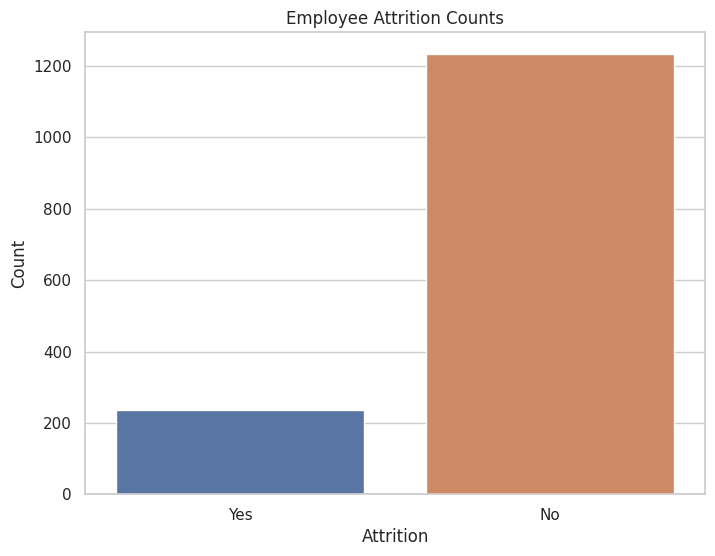

In [810]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='Attrition', data=dataframe)

plt.title('Employee Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.savefig('imbalancedata.png')
plt.show()


The data looks imbalanced , ration is like 1:6

In [811]:
corr_matrix=dataframe[numerical_features].corr()

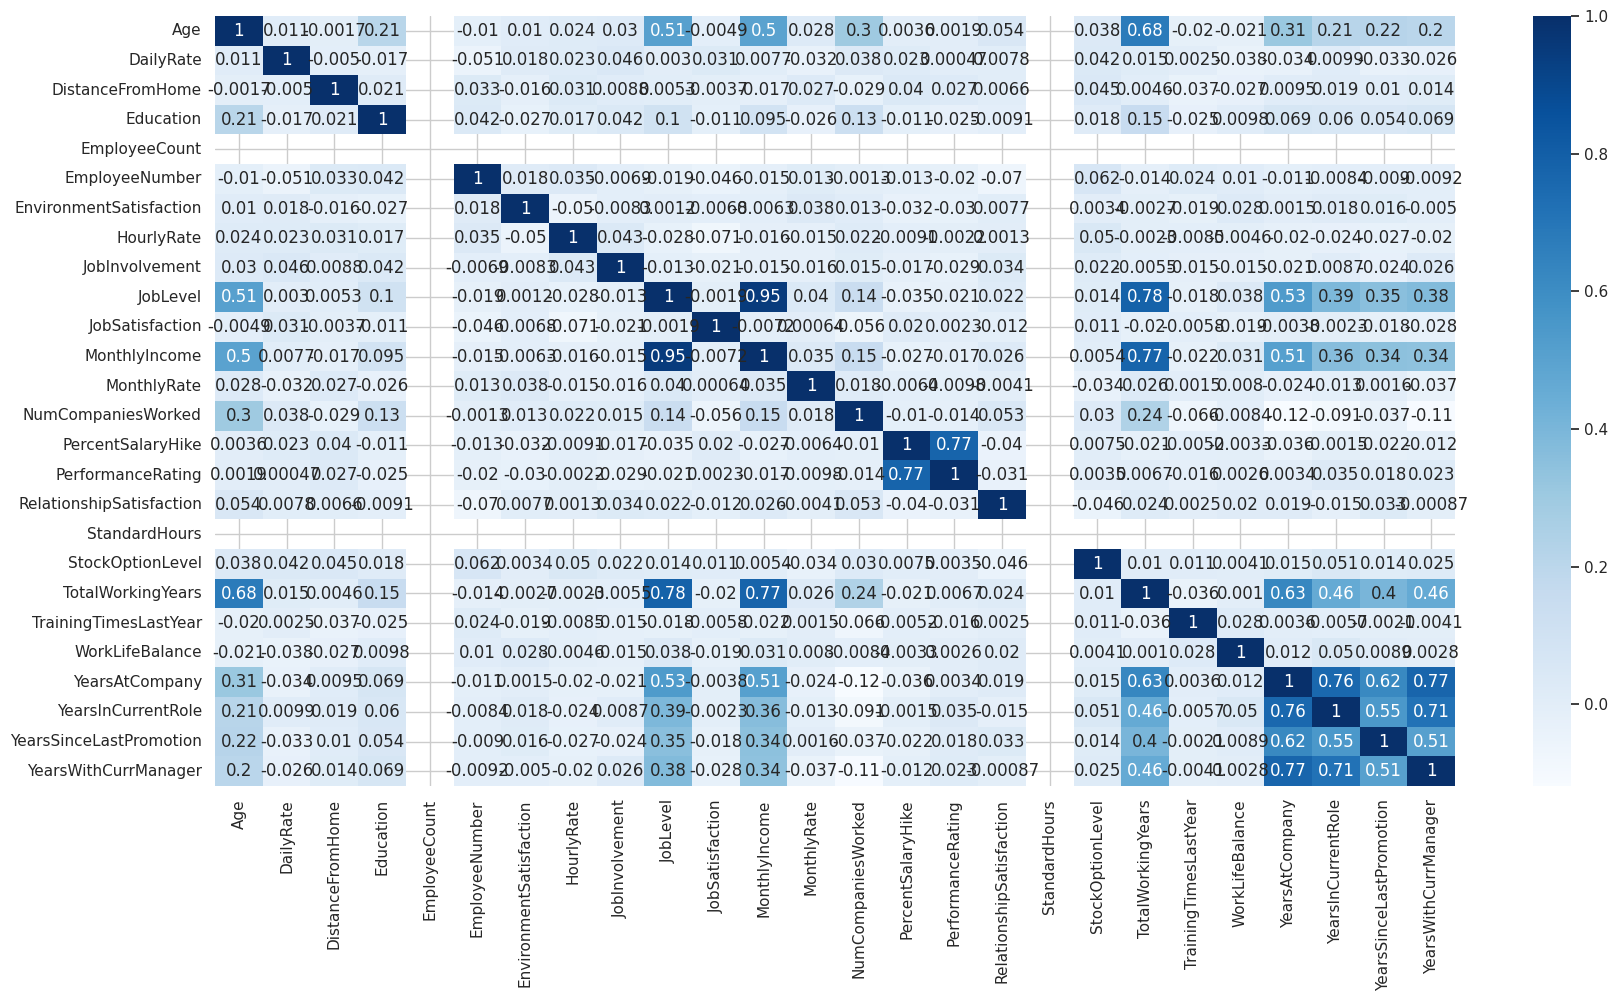

In [812]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

-> according above correlation heat map , there is a linear relation ship between income & job level , job level & TotalWorkingYears,Monthly Income & TotalWorkingYears so we can take one of them for prediction

In [813]:
dataframe['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [814]:
numerical_features.remove("MonthlyIncome")
numerical_features.remove("TotalWorkingYears")
numerical_features.remove("PercentSalaryHike")

<ipython-input-815-b8f8c4ed0ce1>:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


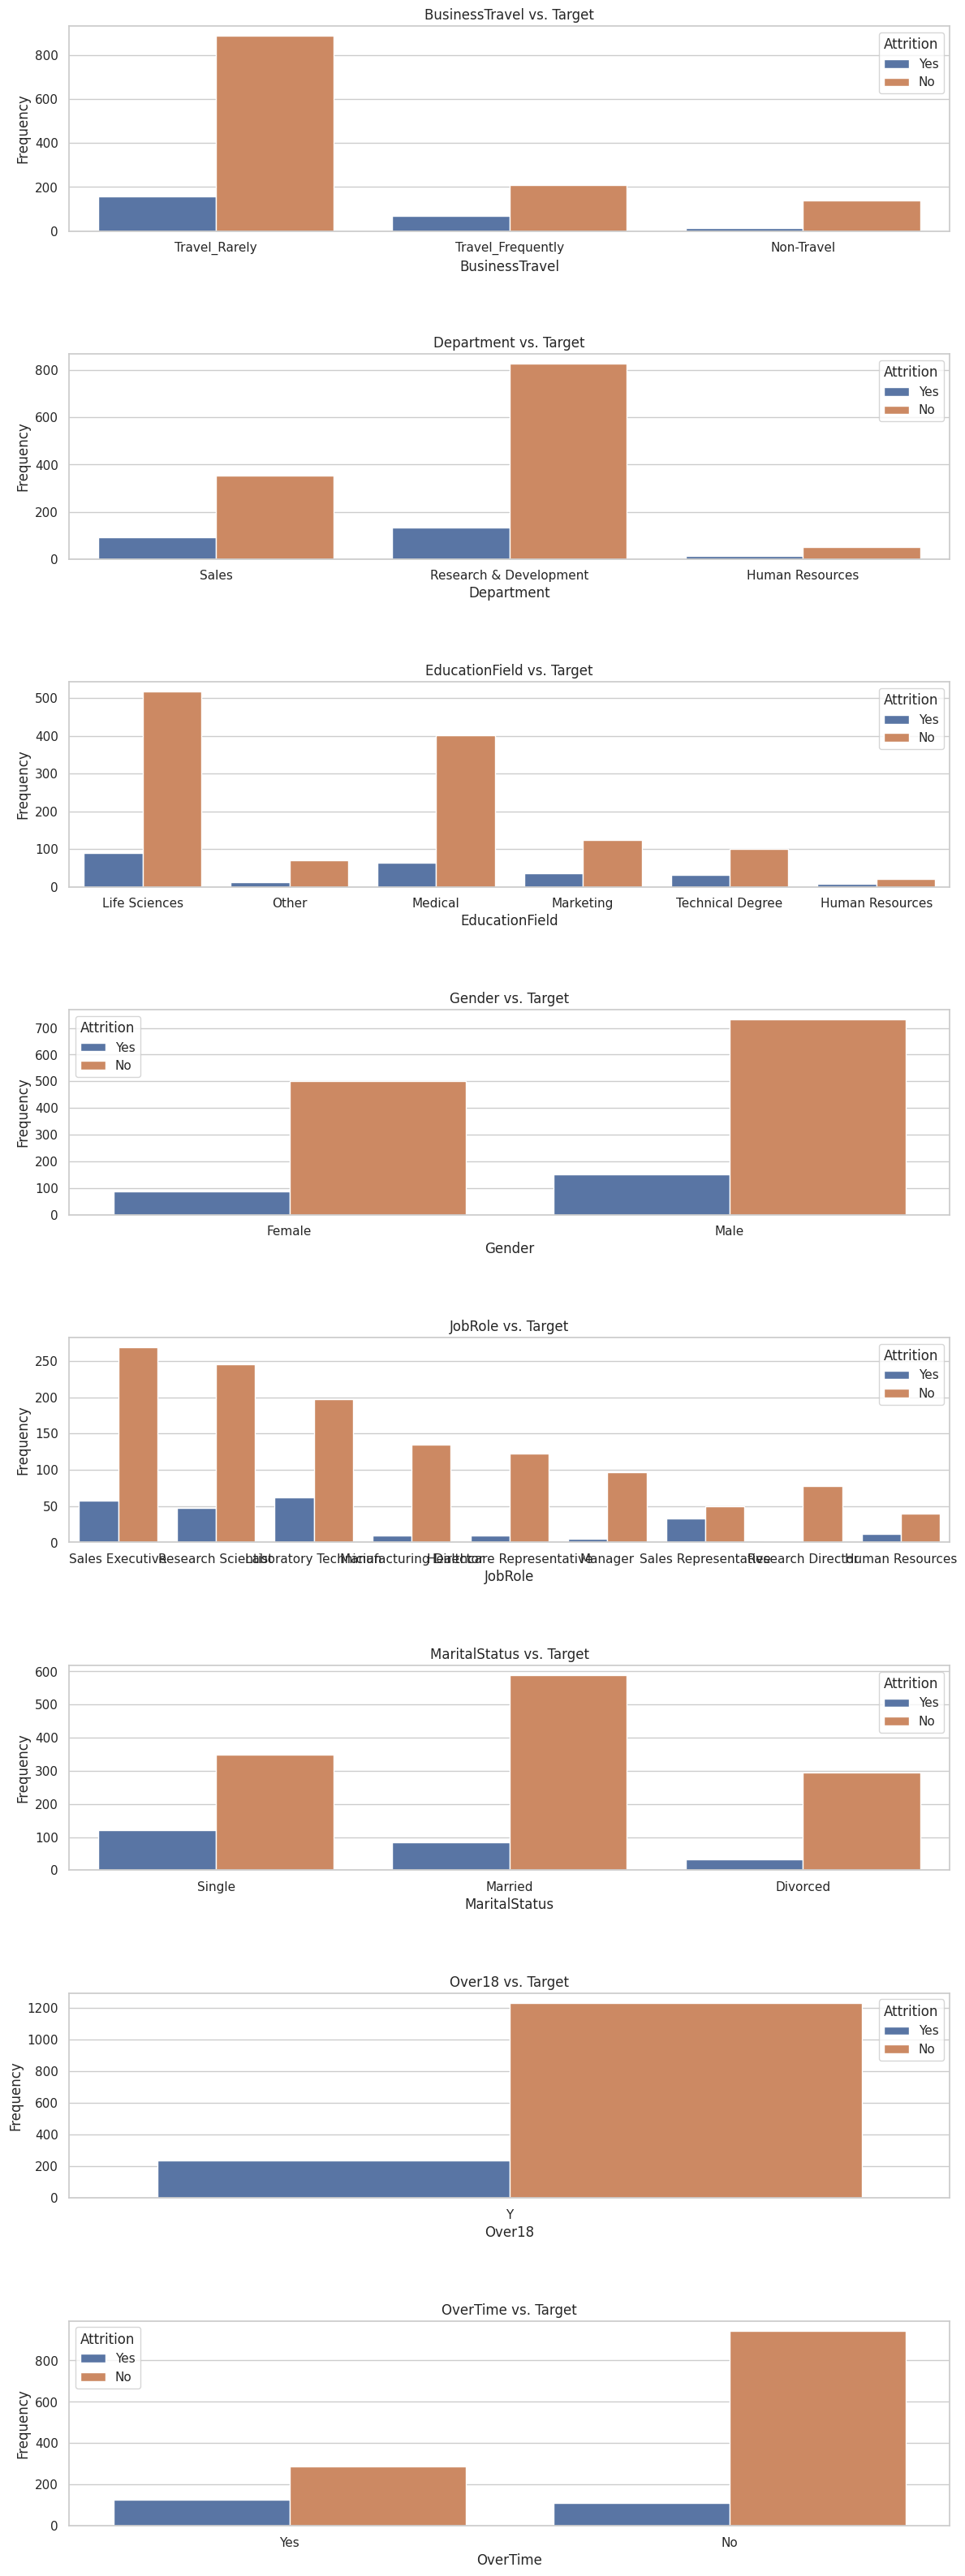

In [815]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(14, 5*len(categorical_features)),gridspec_kw={'hspace': 0.6})
for i, var in enumerate(categorical_features):
    sns.countplot(x=var, hue='Attrition', data=dataframe, ax=axes[i])
    axes[i].set_title(f'{var} vs. Target')
    axes[i].set_ylabel('Frequency')
    print("\n\n\n")

plt.savefig("categorical features vs target.png")
plt.tight_layout()
plt.show()

In [816]:
from scipy.stats import chi2_contingency

dependent_categorical_features = []

for var in categorical_features:
    contingency_table = pd.crosstab(dataframe[var], dataframe['Attrition'])

    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    significance_level = 0.05

    if p_val < significance_level:
        dependent_categorical_features.append(var)


In [817]:
print(f"{len(categorical_features)} vs {len(dependent_categorical_features)}")

8 vs 6


In [818]:
dependent_categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [819]:
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [820]:
for col in numerical_features:
  if len(dataframe[col].unique())<=1:
    print(f"not need {col}")
    numerical_features.remove(col)

not need EmployeeCount
not need StandardHours


In [821]:
len(numerical_features)+len(dependent_categorical_features)

27

In [822]:
features_for_prediction=numerical_features+dependent_categorical_features

In [823]:
y=dataframe['Attrition']

In [824]:
X=dataframe[features_for_prediction]

In [825]:
X[dependent_categorical_features]

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married,No


<ipython-input-826-ba28470907d9>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


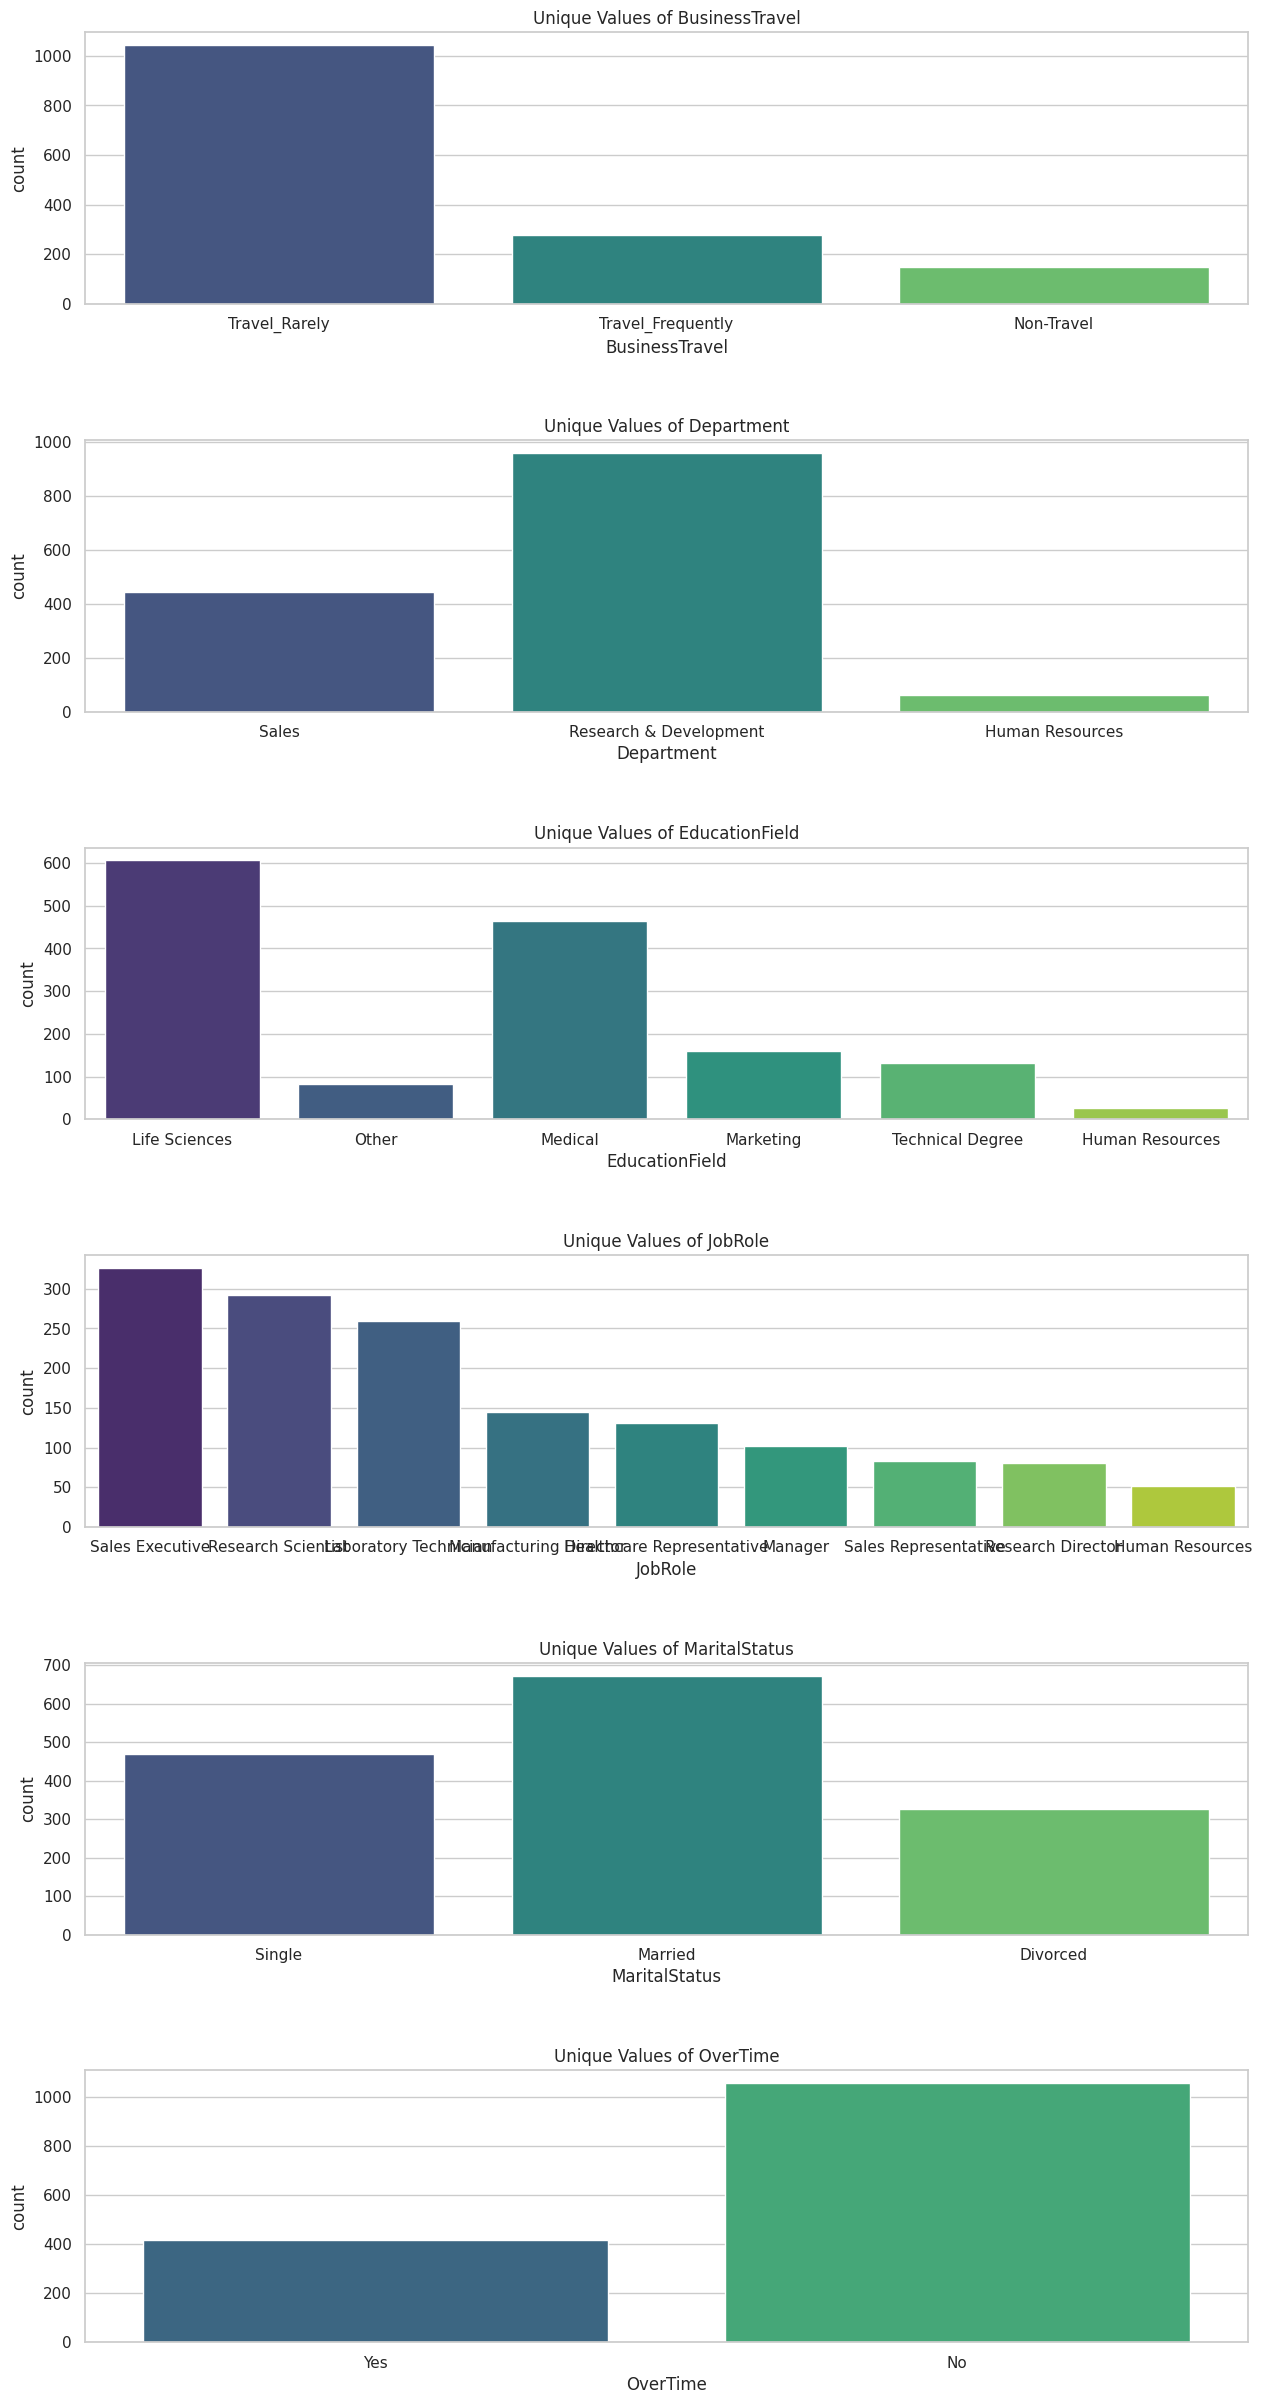

In [826]:
fig, axes = plt.subplots(nrows=len(dependent_categorical_features), ncols=1, figsize=(15, len(dependent_categorical_features) * 5),
                         gridspec_kw={'hspace': 0.5})

for i, col in enumerate(dependent_categorical_features):
    sns.countplot(x=col, data=X, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Unique Values of {col}')
plt.savefig("analyse_categorical_unique_feature.png")
plt.tight_layout()
plt.show()

In [827]:
for col in dependent_categorical_features:
  print(f"The unique values under {col} is -->   {X[col].unique()} & number of unique values is {len(X[col].unique())}")

The unique values under BusinessTravel is -->   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] & number of unique values is 3
The unique values under Department is -->   ['Sales' 'Research & Development' 'Human Resources'] & number of unique values is 3
The unique values under EducationField is -->   ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] & number of unique values is 6
The unique values under JobRole is -->   ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] & number of unique values is 9
The unique values under MaritalStatus is -->   ['Single' 'Married' 'Divorced'] & number of unique values is 3
The unique values under OverTime is -->   ['Yes' 'No'] & number of unique values is 2


In [828]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

spitting the data

In [829]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85,random_state=0)

In [830]:
y_train

381     No
1137    No
914     No
634     No
184     No
        ..
763     No
835     No
1216    No
559     No
684     No
Name: Attrition, Length: 1249, dtype: object

Encoding the data

In [831]:
y_train=y_train.map({'Yes':1,'No':0})
y_test=y_test.map({'Yes':1,'No':0})

In [832]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [833]:
clt=ColumnTransformer(transformers=[
    ('encoding',OneHotEncoder(handle_unknown='ignore'),dependent_categorical_features),
   ('scaling',MinMaxScaler(),numerical_features)

], remainder="passthrough")

In [834]:
clt.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['BusinessTravel', 'Department',
                                  'EducationField', 'JobRole', 'MaritalStatus',
                                  'OverTime']),
                                ('scaling', MinMaxScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'Education', 'EmployeeNumber',
                                  'EnvironmentSatisfaction', 'HourlyRate',
                                  'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyRate',
                                  'NumCompaniesWorked', 'PerformanceRating',
                                  'RelationshipSatisfaction',
                                  'StockOptionLevel', 'TrainingTimesLastYear',
                                  'WorkLifeBalance', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])])

In [835]:
X_train=clt.transform(X_train)
X_test=clt.transform(X_test)

In [836]:
len(X_train[0])

47

In [837]:

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.33, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

use multiple classification model to check which perform well with default parameter

In [838]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [839]:
classification_models=[RandomForestClassifier(),LogisticRegression(),KNeighborsClassifier(),SVC()]

In [840]:
for model in classification_models:
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  print(f"{model}--->Accuracy score is :- {accuracy_score(y_test,pred)}")
  print("\n")

RandomForestClassifier()--->Accuracy score is :- 0.8552036199095022


LogisticRegression()--->Accuracy score is :- 0.8733031674208145


KNeighborsClassifier()--->Accuracy score is :- 0.8235294117647058


SVC()--->Accuracy score is :- 0.8687782805429864




Among these model , Logistic Regression perform well in this binary classification

In [841]:
from sklearn.model_selection import GridSearchCV

In [842]:
logistic=LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 1000, 10000],
    'class_weight': [None, 'balanced'],

}

grid_search = GridSearchCV(logistic, param_grid, cv=2)

In [843]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']})

In [844]:
grid_search.best_params_

{'C': 10,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [845]:
grid_search.best_score_

0.8195488721804511

There is no improvement by doing parameter tunning for this data set
it is okay to use Logistic regression with default parameter

In [846]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [847]:
pred=grid_search.predict(X_test)

In [848]:
score=accuracy_score(y_test,pred)

In [849]:
score

0.8597285067873304

In [850]:
conf_matrix=confusion_matrix(y_test,pred)

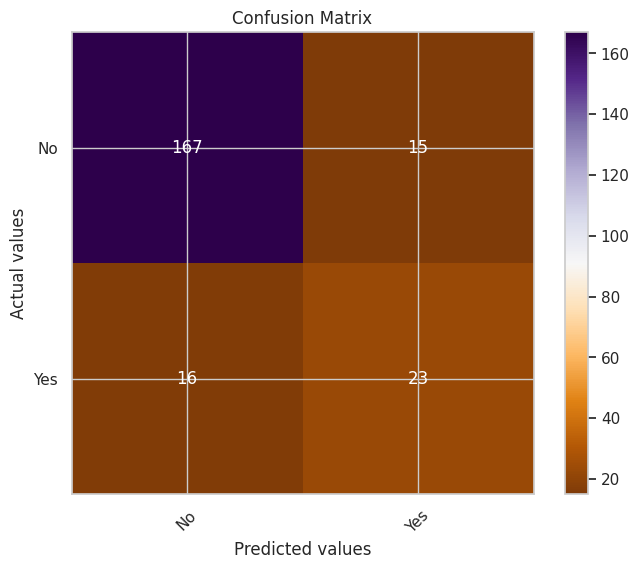

In [851]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

classes = ['No', 'Yes']


plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.PuOr)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual values')
plt.xlabel('Predicted values')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')


plt.savefig('confusion_matrix.png')
plt.show()